# Prepare data

I saved the "inpatientCharges.csv' file after EDA and feature engineering as a new .csv file called "healthcare.csv", which I will use for this project.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('healthcare.csv')

In [2]:
# Check for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 29 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   DRG                                           163065 non-null  object 
 1   Provider_Id                                   163065 non-null  int64  
 2   Provider_Name                                 163065 non-null  object 
 3   Provider_StreetAddress                        163065 non-null  object 
 4   Provider_City                                 163065 non-null  object 
 5   Provider_State                                163065 non-null  object 
 6   Provider_Zipcode                              163065 non-null  int64  
 7   Hospital_referral_region_desp                 163065 non-null  object 
 8   Total_Discharges                              163065 non-null  int64  
 9   Average_Total_Payments                        16

In [5]:
# Check for NaN or infinity values
if df.isnull().values.any():
    # Fill missing values with median
    df.fillna(df.median(), inplace=True)

# Keep 2 decimal points
df = df.round(2)

In [18]:
# Select features that I will use for KNN and PCA model
selected_features = ['Total_Discharges',
                     'Average_Total_Payments',
                     'Average_Medicare_Payment',
                     'Total_Payments_Per_Discharge',
                    'Medicare_Payments_Per_Discharge',
                    'Payment_Difference',
                    'Ratio_AvgTotalPayments_to_Median',
                    'Ratio_AvgMedPayment_to_Median',
                    'Ratio_TotalDischarges_to_Median',
                    'DRG_Median_Average_Total_Payments',
                    'DRG_Median_Total_Discharges',
                    'Ratio_AvgTotalPayments_to_Median_DRG',
                    'Ratio_AvgMedPayment_to_Median_DRG',
                    'Ratio_TotalDischarges_to_Median_DRG',
                    'Payment_Ratio_Deviation_from_Median_by_State',
                    'Payment_Ratio_Deviation_from_Median_by_DRG']

# Principle Component Analysis (PCA)
PCA is a dimensionality reduction technique used to transform a dataset into a new coordinate system, where the data's variance is maximized along the principal components. It identifies and ranks the most important features (principal components) that capture the most variance in the data. PCA can help find outliers because outliers in a dataset typically contribute to a significant portion of the variance, causing them to be more prominent along certain principal components. Therefore, by examining the extreme values along these components, PCA can effectively highlight and identify outliers in the data.

In [61]:
# Create a new DataFrame with the selected features
X = df[selected_features]

from sklearn.model_selection import train_test_split

#split data
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [62]:
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments_Per_Discharge,Medicare_Payments_Per_Discharge,Payment_Difference,Ratio_AvgTotalPayments_to_Median,Ratio_AvgMedPayment_to_Median,Ratio_TotalDischarges_to_Median,DRG_Median_Average_Total_Payments,DRG_Median_Total_Discharges,Ratio_AvgTotalPayments_to_Median_DRG,Ratio_AvgMedPayment_to_Median_DRG,Ratio_TotalDischarges_to_Median_DRG,Payment_Ratio_Deviation_from_Median_by_State,Payment_Ratio_Deviation_from_Median_by_DRG
50634,24,20501.83,19789.20,854.24,824.55,-712.63,2.84,3.21,0.89,28601.24,24.0,0.72,0.75,1.00,1.63,0.11
129854,25,7553.12,5455.72,302.12,218.23,-2097.40,1.05,0.89,0.93,7061.00,27.0,1.07,0.90,0.93,0.12,0.01
22416,75,7929.56,7030.00,105.73,93.73,-899.56,1.10,1.14,2.78,8925.30,73.0,0.89,0.86,1.03,0.00,0.06
82322,24,3310.75,2608.58,137.95,108.69,-702.17,0.46,0.42,0.89,3176.58,25.0,1.04,1.18,0.96,0.39,0.04
86625,15,5846.80,4299.53,389.79,286.64,-1547.27,0.81,0.70,0.56,5990.31,16.0,0.98,0.81,0.94,0.10,0.08


In [63]:
from pyod.models.pca import PCA

# Initialize and fit PCA model to train dataset
pca = PCA() 
pca.fit(X_train)

PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [64]:
# get the prediction labels and outlier scores of the training data
y_train_pred = pca.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = pca.decision_scores_  # .decision_scores_ yields the raw outlier scores for the training data
y_train_scores = pca.decision_function(X_train) # You also can use .decision_function()
y_train_pred = pca.predict(X_train) # You also can use .decision_function()

# Testing data
y_test_scores = pca.decision_function(X_test) # You also can use .decision_function()
y_test_pred = pca.predict(X_test) # You also can use .decision_function()

In [65]:
# generate explained variance ratio using learned functions
[pca.explained_variance_,
pca.explained_variance_ratio_]

[array([7.99038366e+00, 3.07391854e+00, 1.92831964e+00, 9.94770109e-01,
        9.76492219e-01, 4.37570086e-01, 3.18039630e-01, 1.15784336e-01,
        9.27081520e-02, 5.00535916e-02, 2.00969169e-02, 1.97467783e-03,
        6.69551188e-06, 3.22830844e-06, 1.16455336e-06, 6.31131968e-31]),
 array([4.99395151e-01, 1.92118436e-01, 1.20519053e-01, 6.21726552e-02,
        6.10302959e-02, 2.73479207e-02, 1.98773245e-02, 7.23646554e-03,
        5.79421509e-03, 3.12832549e-03, 1.25604768e-03, 1.23416418e-04,
        4.18466284e-07, 2.01767731e-07, 7.27840270e-08, 3.94454456e-32])]

1. `pca.explained_variance_` contains the explained variance for each principal component. It represents the amount of variance in the original data that is explained by each principal component. For example, the first principal component explains approximately 7.99 units of variance, while the second explains about 3.07 units, and so on.

2. `pca.explained_variance_ratio_` contains the explained variance ratio for each principal component, which is the percentage of the total variance explained by each component. For instance, the first principal component explains approximately 49.94% of the total variance, the second explains about 19.21%, and so on.

# Determine the thershold

In [66]:
print("The threshold for the defined comtanimation rate:" , pca.threshold_)

The threshold for the defined comtanimation rate: 1.3594247536997715e+32


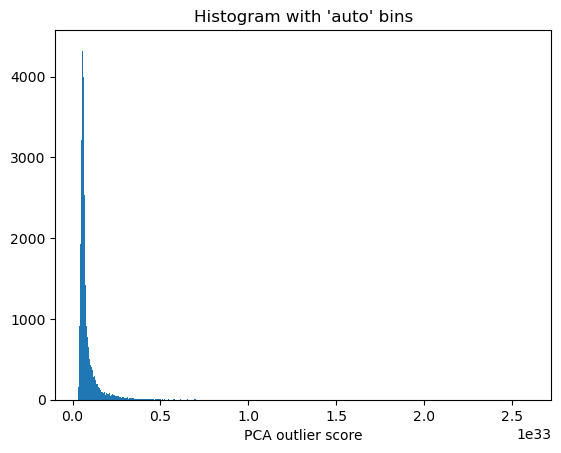

In [67]:
# get the prediction on the test data
y_test_pred = pca.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = pca.decision_function(X_test)  # outlier scores

import matplotlib.pyplot as plt
# Histogram with 'auto' bins
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('PCA outlier score')

plt.show()

The exceptionally large threshold value indicates that when applying PCA to my dataset, nearly all of the original features are essential for preserving the data's variance. The cumulative explained variance ratio is close to 100%, implying that there is minimal dimensionality reduction. In other words, PCA suggests that retaining all the original features is necessary to maintain the dataset's key information.

# Descriptive statistics
Descriptive statistics for both the training and test data, categorized into normal and outlier groups. This includes summary statistics for all the selected features.

In [32]:
threshold = pca.threshold_
threshold

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments_Per_Discharge,Medicare_Payments_Per_Discharge,Payment_Difference,Ratio_AvgTotalPayments_to_Median,Ratio_AvgMedPayment_to_Median,Ratio_TotalDischarges_to_Median,DRG_Median_Average_Total_Payments,DRG_Median_Total_Discharges,Ratio_AvgTotalPayments_to_Median_DRG,Ratio_AvgMedPayment_to_Median_DRG,Ratio_TotalDischarges_to_Median_DRG,Payment_Ratio_Deviation_from_Median_by_State,Payment_Ratio_Deviation_from_Median_by_DRG,Anomaly_Score
0,Normal,117406,89.999387,37.81,8033.05,6939.98,330.66,285.89,-1093.06,1.11,1.13,1.40,7862.16,32.70,1.03,1.04,1.19,0.40,0.16,6.557665e+31
1,Outlier,13046,10.000613,87.70,24801.64,22512.83,1091.82,997.87,-2288.81,3.44,3.66,3.25,21634.04,42.81,1.24,1.23,1.90,2.43,0.82,2.319476e+32


### Interpretation:
The above table presents the characteristics of the normal and abnormal groups. It shows the count and count percentage of the normal and outlier groups. 

1. **The size of the outlier group**: The threshold for determining outliers is set at PCA suggested value. As a result, the size of the "Outlier" group is determined to be 10.00% of the total, indicating that 10% of the data points are considered outliers based on the chosen threshold.

2. **The feature statistics in each group**: The means of the features in the "Outlier" group are consistently larger than those in the "Normal" group. For example, the "Average_Total_Payments" in the "Outlier" group is significantly higher than in the "Normal" group, indicating that outliers have higher average payments (24801.64>8033.05).

3. **The average anomaly score**: The average anomaly score for the "Outlier" group is substantially higher than that of the "Normal" group. The anomaly score is a measure of how much a data point deviates from the norm, and the higher average score in the "Outlier" group suggests that these data points are more anomalous compared to the "Normal" group (2.319476e+32>6.557665e+31). 


# The K-nearest Neighbor Algorithm(KNN)
The K-nearest Neighbor Algorithm (KNN) is a machine learning algorithm used for both classification and regression tasks. It works by finding the K training examples (data points) in its training dataset that are closest in distance to a new, unseen data point and assigns a label or value based on the majority class or average of those K neighbors. KNN can find outliers by identifying data points that have the fewest neighboring data points within their vicinity, which makes them stand out as distant from the rest of the data, potentially indicating that they are anomalies or outliers in the dataset. The "K" in KNN represents the number of nearest neighbors considered, and by selecting a small K, we can make the algorithm more sensitive to outliers as they are less likely to have many nearby neighbors to match their characteristics.

In [33]:
#I need to split data again because the previous model has comprimised the x_train and x_test.
X = df[selected_features]
X_train, X_test= train_test_split(X, test_size=0.2, random_state=42)

In [35]:
from pyod.models.knn import KNN
knn = KNN() 
knn.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [36]:
# Training data
y_train_scores = knn.decision_function(X_train)
y_train_pred = knn.predict(X_train)

# Test data
y_test_scores = knn.decision_function(X_test)
y_test_pred = knn.predict(X_test) # outlier labels (0 or 1)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , knn.threshold_)

The training data: {0: 118489, 1: 11963}
The training data: {0: 29394, 1: 3219}
The threshold for the defined comtanimation rate: 575.3845331967357


In the training data, there are 118,489 normal data points (class 0) and 11,963 outlier data points (class 1), while in the test data, there are 29,394 normal data points and 3,219 outliers. The knn.threshold_ value, which is approximately 575.38, is used to define a contamination rate for identifying outliers. This threshold can be used to flag data points as outliers if their decision function scores are above this value.

# Determine the Thereshold

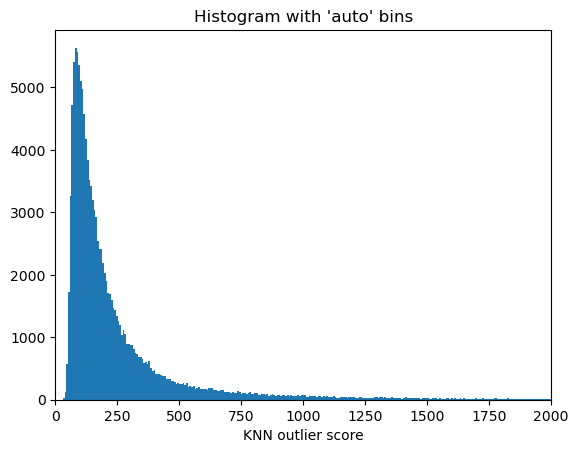

In [53]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('KNN outlier score')

# Set the x-axis limit to be from 0 to 1000
plt.xlim(0, 2000)
plt.show()

In [39]:
# Description Statistics

threshold = knn.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments_Per_Discharge,Medicare_Payments_Per_Discharge,Payment_Difference,Ratio_AvgTotalPayments_to_Median,Ratio_AvgMedPayment_to_Median,Ratio_TotalDischarges_to_Median,DRG_Median_Average_Total_Payments,DRG_Median_Total_Discharges,Ratio_AvgTotalPayments_to_Median_DRG,Ratio_AvgMedPayment_to_Median_DRG,Ratio_TotalDischarges_to_Median_DRG,Payment_Ratio_Deviation_from_Median_by_State,Payment_Ratio_Deviation_from_Median_by_DRG,Anomaly_Score
0,Normal,118489,90.829577,42.96,7946.06,6898.03,319.14,277.76,-1048.04,1.10,1.12,1.59,7741.62,34.23,1.04,1.05,1.25,0.39,0.16,179.12
1,Outlier,11963,9.170423,41.22,27181.21,24338.16,1274.81,1142.86,-2843.05,3.77,3.95,1.53,24074.68,28.64,1.21,1.16,1.32,2.72,0.87,1292.46


#### Interpretation
The above table presents the characteristics of the normal and abnormal groups. It shows the count and count percentage of the normal and outlier groups.
1. **Size of Outlier Group**: As shown in the statistic description table, the size of the "Outlier" group is 11,963, which represents approximately 9.17% of the total data. This group size is important, especially when determining a threshold for anomaly detection, as it affects the balance between normal and outlier data points.

2. **Feature Statistics in Each Group**: The feature statistics in the "Outlier" group, such as the "Average_Total_Payments" and "Average_Medicare_Payment," are significantly higher than those in the "Normal" group. For example, the average total payment in the "Outlier" group is significantly higher than those in the "Normal" group(27181.21>7946.06).

3. **Average Anomaly Score**: The "Anomaly_Score" is an indicator of how different the data points in the "Outlier" group are from the "Normal" group. In this case, the "Outlier" group has a significantly higher average anomaly score of 1,292.46 compared to the "Normal" group's score of 179.12. Higher anomaly scores in the "Outlier" group indicate that these data points deviate more from the norm and are more likely to be outliers.

# Achieve Model Stability by Aggregating Multiple KNN Models

KNNs can be sensitive to the choice of k. To produce a model with a stable outcome, the best practice is to build multiple KNN models and then aggregate the scores. This approach will reduce the chance of overfitting and increase prediction accuracy. I’ll create 20 KNN models for a range of k neighbors from 10 to 200.

In [68]:
# I need to split data again because the previous model has comprimised the x_train and x_test.
X = df[selected_features]
X_train, X_test= train_test_split(X, test_size=0.2, random_state=42)

In [ ]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
# Standardize data
X_train_norm, X_test_norm = standardizer(X_train, X_test)
# Test a range of k-neighbors from 10 to 200. There will be 20 k-NN models.
k_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 
 120, 130, 140, 150, 160, 170, 180, 190, 200]
n_clf = len(k_list)
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])
train_scores.shape
# Modeling
for i in range(n_clf):
    k = k_list[i]
    clf = KNN(n_neighbors=k, method='largest')
    clf.fit(X_train_norm)

    # Store the results in each column:
    train_scores[:, i] = clf.decision_scores_
    test_scores[:, i] = clf.decision_function(X_test_norm) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

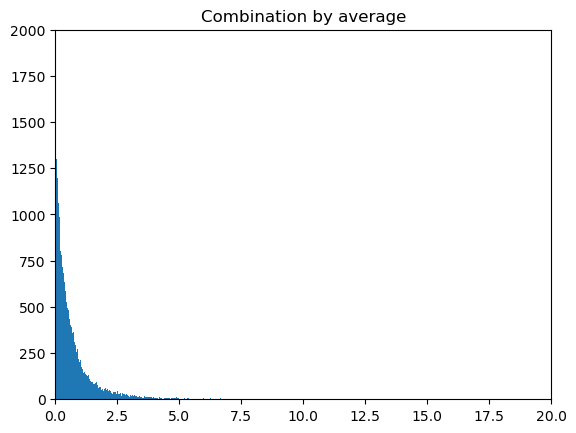

In [58]:
# Combination by average
# The test_scores_norm is 500 x 10. The "average" function will take the average of the 10 columns. 
# The result "y_by_average" is a single column: 
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")

plt.show()

In [46]:
descriptive_stat_threshold(X_train,y_train_by_average, 0.5)

,Group,Count,Count %,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments_Per_Discharge,Medicare_Payments_Per_Discharge,Payment_Difference,Ratio_AvgTotalPayments_to_Median,Ratio_AvgMedPayment_to_Median,Ratio_TotalDischarges_to_Median,DRG_Median_Average_Total_Payments,DRG_Median_Total_Discharges,Ratio_AvgTotalPayments_to_Median_DRG,Ratio_AvgMedPayment_to_Median_DRG,Ratio_TotalDischarges_to_Median_DRG,Payment_Ratio_Deviation_from_Median_by_State,Payment_Ratio_Deviation_from_Median_by_DRG,Anomaly_Score
0,Normal,113490,86.997516,37.15,7878.47,6840.74,335.26,292.08,-1037.74,1.09,1.11,1.38,7791.47,32.02,1.02,1.03,1.18,0.39,0.15,-0.23
1,Outlier,16962,13.002484,80.59,21964.53,19581.59,885.30,792.09,-2382.94,3.04,3.18,2.98,18927.47,45.05,1.24,1.22,1.83,2.02,0.74,1.52


#### Interpretation:
1. **Size of Outlier Group**: In the agrregated model, the size of the "Outlier" group consists of 16,962 data points, representing approximately 13.00% of the total dataset. 

2. **Feature Statistics in Each Group**: The feature statistics in the "Outlier" group, such as "Average_Total_Payments" and "Average_Medicare_Payment," are notably higher compared to the "Normal" group. For instance, the average total payment in the "Outlier" group is 21,964.53, while in the "Normal" group, it's 7,878.47. This disparity in feature statistics is essential for identifying anomalies, as it indicates significant deviations from the norm.

3. **Average Anomaly Score**: The "Anomaly_Score" is an indicator of how different the data points in the "Outlier" group are from the "Normal" group. In this case, the "Outlier" group has a considerably higher average anomaly score (1.52) compared to the "Normal" group's score (-0.23). Higher average anomaly scores within the "Outlier" group suggest that these data points exhibit more pronounced deviations from the norm and are more likely to be outliers.